In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib import rcParams

# making sure plots & clusters are reproducible
np.random.seed(42)

In [2]:
# directory paths
master_table = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/GSE124685/211213_FC_IPF_stages_bulk_DGE_MASTER_table.csv'
ligands_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/NicheNet/conserved_ligands_counts.csv'
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/ASK_joint/'

In [3]:
## plotting variables
plt.rcParams['figure.figsize'] = (4, 24)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## read master table
master = pd.read_csv(master_table, index_col=0)
master.head(5)

,ipf1_logFC,ipf1_adj_p_val,ipf2_logFC,ipf2_adj_p_val,ipf3_logFC,ipf3_adj_p_val,FC_logFC,FC_adj_p_val
A1BG,0.113428,0.731666,0.312365,0.286459,0.140477,0.935197,0.510958,0.999984
A2M,0.602106,0.319526,0.549137,0.494127,0.351658,0.867058,-0.580821,0.999984
A2ML1,0.109573,0.733621,0.043715,0.999976,0.037047,0.998974,-0.915168,NaN
A4GALT,-0.064129,0.905067,0.200724,0.957387,0.214847,0.966702,0.916265,0.759586
A4GNT,0.120505,0.730561,0.041791,0.999976,0.009141,0.998974,-0.319549,NaN


In [5]:
## read ligands table
ligands = pd.read_csv(ligands_dir, index_col=0)
ligands = ligands.sort_values(['Freq'], ascending = False)
ligands.head(5)

,Var1,Freq
27,HSP90B1,16
38,LAMB1,15
29,ICAM1,12
36,ITGB1,10
2,ADAM17,10


### Filter master table

In [6]:
#master = master[master.FC_adj_p_val < 0.1]
#master[master.isna()] = 0
#master = master[['ipf1_logFC','ipf2_logFC','ipf3_logFC','FC_logFC']]
#master_up = master[master.FC_logFC > 0.25]
#master_down = master[master.FC_logFC < -0.25]

### Select top ligands which are also detect in bulkRNA-seq

In [7]:
top_ligands = ligands['Var1'].to_list()

In [8]:
master_ligands = master[master.index.isin(top_ligands)].copy()

In [9]:
master_ligands_PCLS = master_ligands[['ipf1_logFC','ipf2_logFC','ipf3_logFC','FC_logFC']].dropna()

In [10]:
master_ligands = master_ligands[['ipf1_logFC','ipf2_logFC','ipf3_logFC']].dropna()

In [11]:
master_ligands

,ipf1_logFC,ipf2_logFC,ipf3_logFC
ADAM12,1.289258,1.303953,1.677763
ADAM17,0.074137,-0.281074,-0.161064
AGRN,0.761138,0.770875,0.722887
APP,-0.047094,-0.455235,-0.459480
BMP2,0.466160,-0.423960,-0.637126
C3,0.796907,0.548090,0.486825
CCL5,1.362510,1.329930,0.902884
CD2,1.016277,0.764316,0.582441
CD58,-0.303822,-0.540553,-0.416911
CDH3,2.278594,2.626416,2.709872


### Create logFC for visualization

In [12]:
## ensure color palette is centered at zero
divnorm = TwoSlopeNorm(vmin=master_ligands.min().min(), vcenter=0, vmax=1.5)

In [13]:
cbar_kws = {'shrink': 0.8,
               'extendfrac':.2} 

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


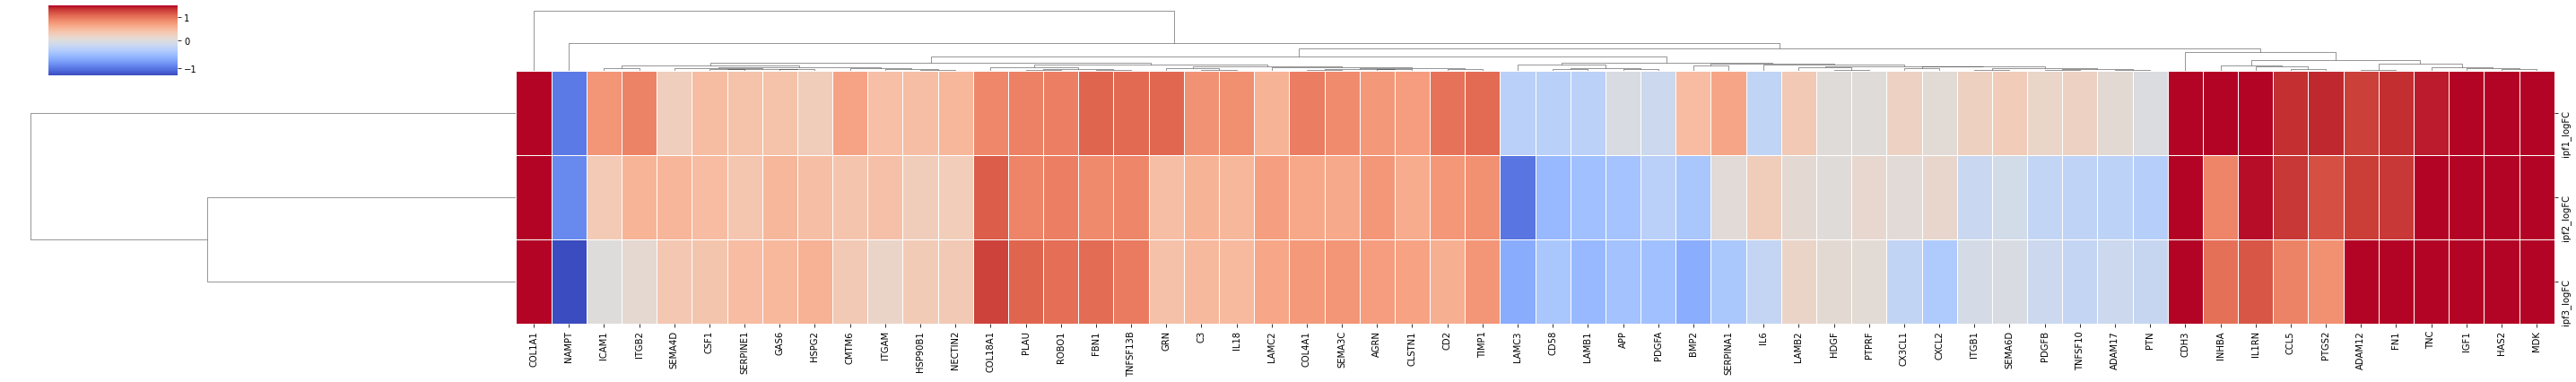

In [14]:
sb.clustermap(master_ligands.transpose(), square=True, cbar_kws=cbar_kws, cmap='coolwarm', figsize=(40, 6), norm=divnorm,
              linewidths=1, linecolor='white')
plt.savefig(fig_dir + '220226_conserved_ligands_across_IPF_orgression.pdf', dpi=300, bbox_inches='tight')
plt.show()

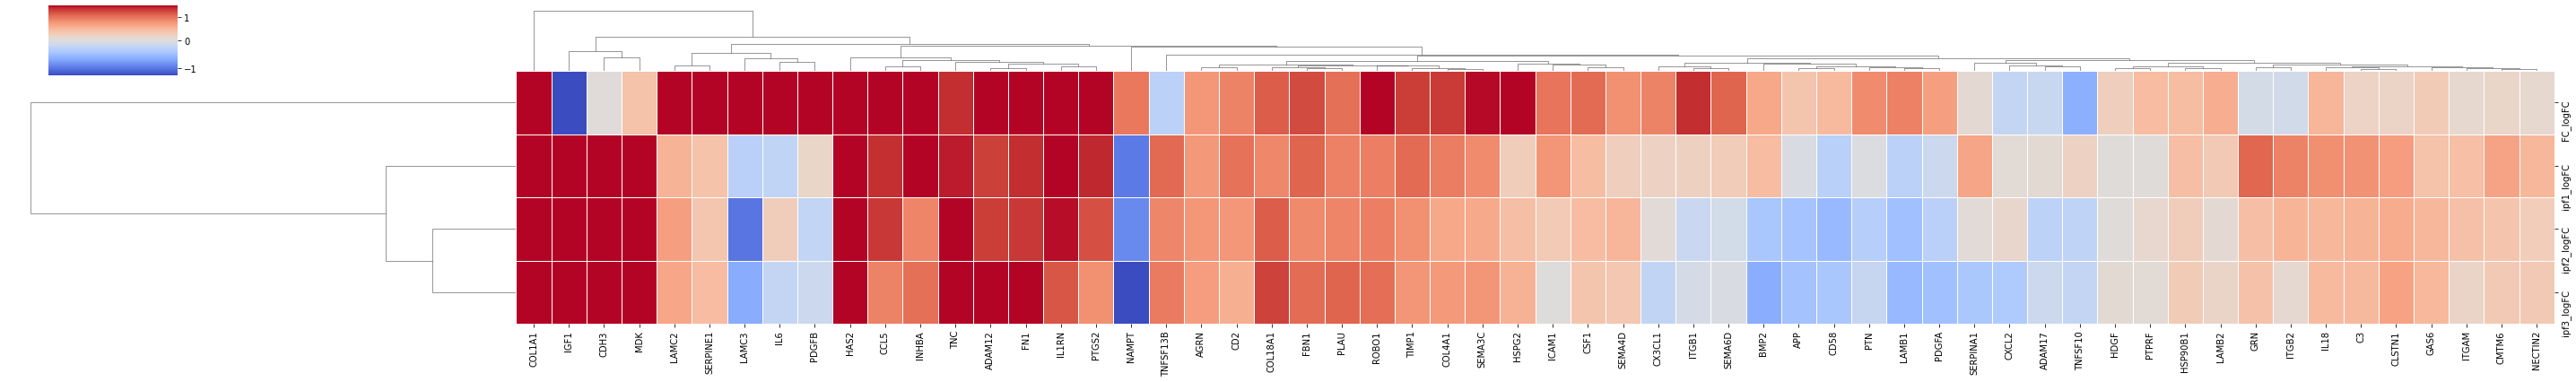

In [15]:
sb.clustermap(master_ligands_PCLS.transpose(), square=True, cbar_kws=cbar_kws, cmap='coolwarm', figsize=(40, 6), norm=divnorm,
              linewidths=1, linecolor='white')
plt.savefig(fig_dir + '220324_conserved_ligands_across_IPF_orgression.pdf', dpi=300, bbox_inches='tight')
plt.show()